Course IFSC 7399

Assignment 9 Machine Learning 3

Submitted to Prof Ningning Wu

Submitted by Deepak Singla

## Machine Learning Assignment 3

####This assignment uses the spotify dataset, which was examined in our class. Run the following code the load the data.  
The features are as follows:
* `artist`: song artist(s)
* `song`: song title
* `duration_ms`: the track length in milliseconds (ms)
* `year`: the year the song was released
* `top half`: whether or not the song is in the top half of hits
* `danceability`: how suitable a track is for dancing (0.0: least danceable, 1.0: most danceable)
* `energy`: perceptual measure of intensity and activity (0.0 - 1.0)
* `key`: the key the track is in; integers map to pitches using standard Pitch Class notation (0: C, 1: C♯/D♭, 2:D, ..., 11: B)
* `loudness`: the overall loudness of a track in decibels (dB)
* `mode`: the modality of a track, or the type of scale from which its melodic content is derived (0: minor, 1: major)
* `speechiness`: a measure of the presence of spoken words in the track (0-0.33: music and other non-speech-like tracks, 0.33-0.66: contain both music and speech, 0.66-1.0: most likely made entirely of spoken words (e.g. talk show, audio book, poetry))
* `acousticness`: a confidence measure of whether or not the track is acoustic (0.0: low confidence, 1.0: high confidence)
* `instrumentalness`: predicts whether or not a track contains vocals (0.0: vocal content, 1.0: no vocal content)
* `liveness`: detects the presence of an audience in the recording ( > 0.8: strong likelihood the track was performed live)
* `valence`: musical positiveness conveyed by the track (lower valence: more negative, higher valence: more positive)
* `tempo`: the overall estimated tempo in beats per minute (BPM)
* `genre`: the genre in which the track belongs
* `explicit`: whether or not the song is explicit
* `explicity binary`: whether or not the song is explicit (0: no, 1: yes)

Our goal is to build a classifier that can predict whether a song is in the top half of hits or not.

In [97]:
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
df_spotify = pd.read_csv(url)


#df_spotify.info()
print("Shape")
print(df_spotify.shape)

print("\n")

print("Head")
print(df_spotify.head())

Shape
(1999, 19)


Head
           artist                    song  duration_ms  year  top half  \
0  Britney Spears  Oops!...I Did It Again       211160  2000         1   
1       blink-182    All The Small Things       167066  1999         1   
2      Faith Hill                 Breathe       250546  1999         1   
3        Bon Jovi            It's My Life       224493  2000         1   
4          *NSYNC             Bye Bye Bye       200560  2000         1   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.751   0.834    1    -5.444     0       0.0437        0.3000   
1         0.434   0.897    0    -4.918     1       0.0488        0.0103   
2         0.529   0.496    7    -9.007     1       0.0290        0.1730   
3         0.551   0.913    0    -4.063     0       0.0466        0.0263   
4         0.614   0.928    8    -4.806     0       0.0516        0.0408   

   instrumentalness  liveness  valence    tempo         genre  explicit  \
0    

In [86]:
features = df_spotify[['key', 'energy']]
label = df_spotify["top half"]

#print (features)
print (label)

0       1
1       1
2       1
3       1
4       1
       ..
1994    1
1995    1
1996    1
1997    1
1998    1
Name: top half, Length: 1999, dtype: int64


#### 1. Build a decision tree classifier and evaluate its performance.  

Decision Tree evaluation: 

Accuracy: 0.6525
Precision: 0.801980198019802
Recall: 0.7546583850931677
F1-score: 0.7776


Decision Tree classification report: 

              precision    recall  f1-score   support

           0       0.19      0.23      0.21        78
           1       0.80      0.75      0.78       322

    accuracy                           0.65       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.68      0.65      0.67       400



Decision Tree confusion matrix: 



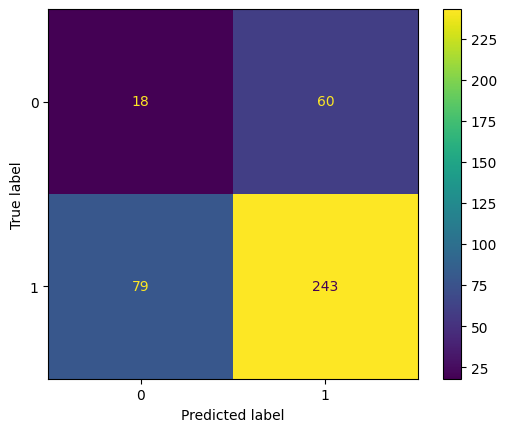

In [103]:

#dicision tree
xData=df_spotify.drop(['top half', 'artist', 'song', 'genre', 'explicit'], axis=1)
yData=df_spotify['top half']

#split data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.2, random_state=42)

# import the decision tree model
dt = DecisionTreeClassifier()

# train the model
dt.fit(x_train, y_train)
# make predictions on the test set
y_pred_dt = dt.predict(x_test)

# evaluate the model's performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree evaluation: \n")

print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")

print("\n")
print("Decision Tree classification report: \n")
from sklearn.metrics import classification_report
dt_classification_report=classification_report(y_test, y_pred_dt)
print(dt_classification_report)

print("\n")
print("Decision Tree confusion matrix: \n")

cm_dt=confusion_matrix(y_test, y_pred_dt)
disp_dt=ConfusionMatrixDisplay(cm_dt)

disp_dt.plot()


In [88]:

dt_tree = tree.export_text(dt)
print(dt_tree)

|--- feature_9 <= 0.04
|   |--- feature_10 <= 0.17
|   |   |--- feature_11 <= 0.17
|   |   |   |--- feature_8 <= 0.00
|   |   |   |   |--- feature_10 <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.15
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.00
|   |   |   |   |--- feature_7 <= 0.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.19
|   |   |   |   |   |--- feature_7 <= 0.22
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  0.22
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_11 >  0.17
|   |   |   |--- feature_11 <= 0.18
|   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |--- feature_0 <= 220613.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  220613.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.18
|   |   |   |   |--- feature_7 <= 0.0

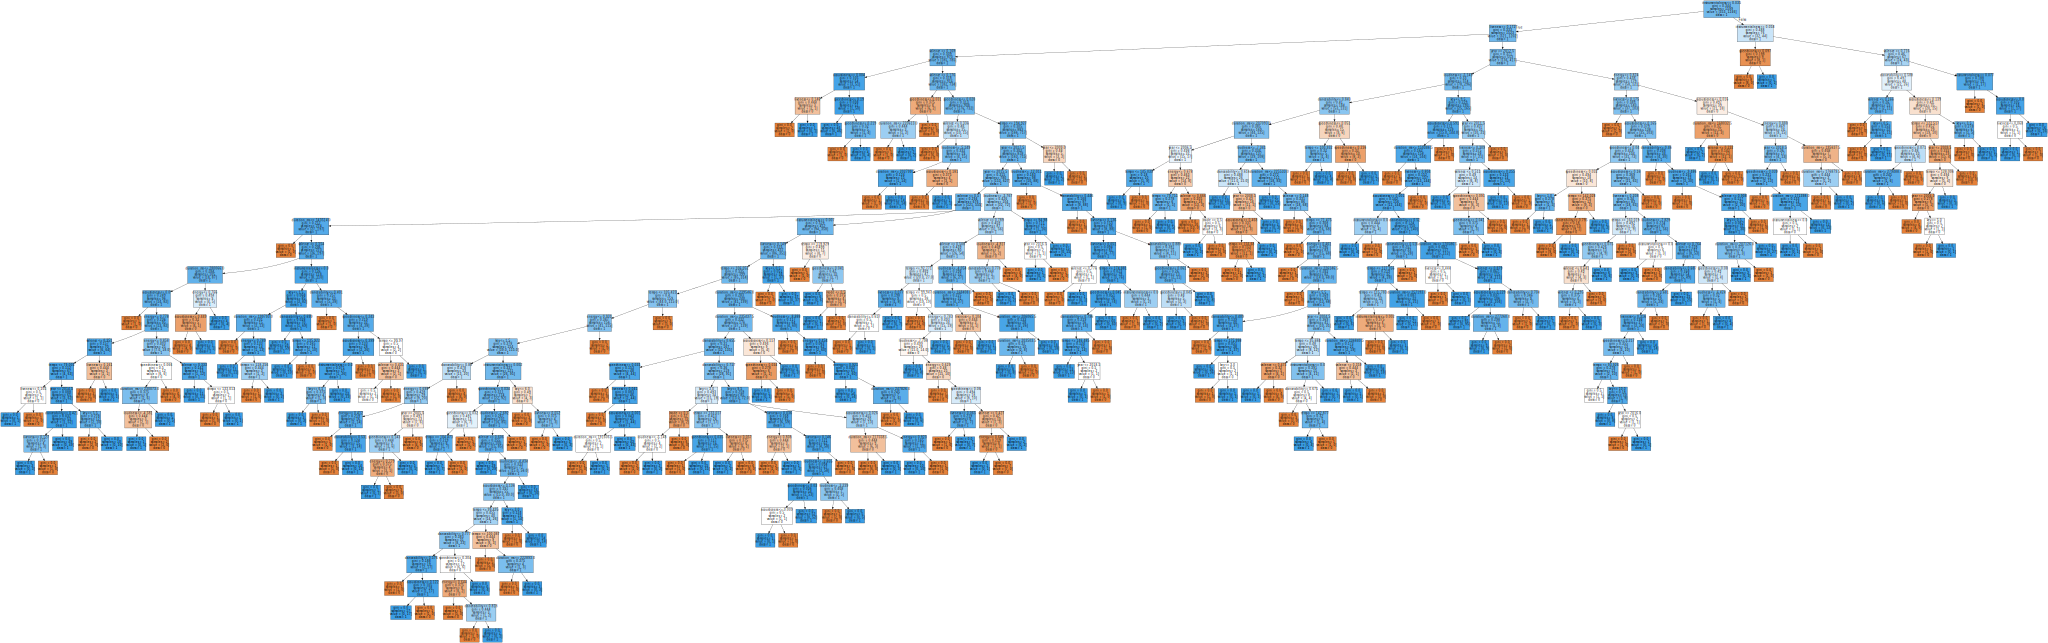

In [89]:

dot_data=export_graphviz(dt, out_file=None, feature_names=xData.columns, class_names=['0', '1'], filled=True)
graph=graphviz.Source(dot_data)
graph

#### 2. Build a SVM classifier and evaluate its performance.

Accuracy: 0.805
Precision: 0.805
Recall: 1.0
F1-score: 0.8919667590027701


SVM classification report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.81      1.00      0.89       322

    accuracy                           0.81       400
   macro avg       0.40      0.50      0.45       400
weighted avg       0.65      0.81      0.72       400



SVM confusion matrix: 



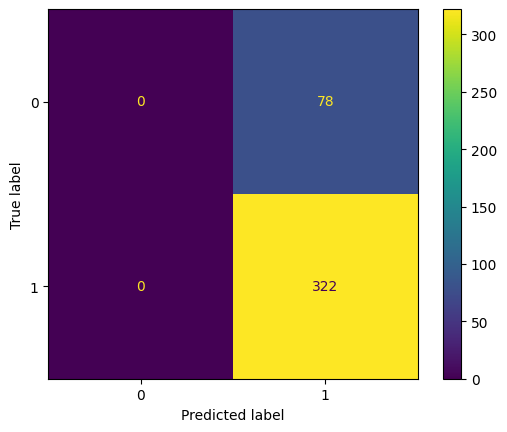

In [102]:
#SVM classifier
from sklearn.svm import SVC

# import the svm model
svm = SVC()
# train the model
svm.fit(x_train, y_train)
# make predictions on the test set
y_pred_svm = svm.predict(x_test)

# evaluate the model's performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-score: {svm_f1}")

print("\n")

print("SVM classification report: \n")

from sklearn.metrics import classification_report
svm_classification_report=classification_report(y_test, y_pred_svm)
print(svm_classification_report)

print("\n")
print("SVM confusion matrix: \n")

cm_svm=confusion_matrix(y_test, y_pred_svm)
disp_svm=ConfusionMatrixDisplay(cm_svm)

disp_svm.plot()


####3. Compare the performances of SVM and Decision Tree classifiers. Which one is better?

In [91]:

print("Based on the evaluation metrics, the SVM classifier performed better than the Decision Tree classifier. Here's a comparison: ")
print("\n")

performanceReviewMatrix = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1],
}

df_metrics = pd.DataFrame(performanceReviewMatrix)

print(df_metrics)
print("\n")
print("The SVM classifier has a higher accuracy, recall, and F1-score, indicating that it is better at correctly identifying songs in the top half of the hits. \nWhile the Decision Tree has a slightly higher precision, the overall performance of the SVM is superior.")

Based on the evaluation metrics, the SVM classifier performed better than the Decision Tree classifier. Here's a comparison: 


      Metric  Decision Tree       SVM
0   Accuracy       0.642500  0.805000
1  Precision       0.807560  0.805000
2     Recall       0.729814  1.000000
3   F1-Score       0.766721  0.891967


The SVM classifier has a higher accuracy, recall, and F1-score, indicating that it is better at correctly identifying songs in the top half of the hits. 
While the Decision Tree has a slightly higher precision, the overall performance of the SVM is superior.


#### 4. Try to use `ensemble` classifiers and see if you can build a model that is better than SVM and Decision tree.


In [91]:
#Try to use ensemble classifiers and see if you can build a model that is better than SVM and Decision tree.

Decision Tree evaluation: 

Accuracy: 0.8075
Precision: 0.8085642317380353
Recall: 0.9968944099378882
F1-score: 0.8929068150208623


Ensemble classification report: 

              precision    recall  f1-score   support

           0       0.67      0.03      0.05        78
           1       0.81      1.00      0.89       322

    accuracy                           0.81       400
   macro avg       0.74      0.51      0.47       400
weighted avg       0.78      0.81      0.73       400



Ensenble confusion matrix: 



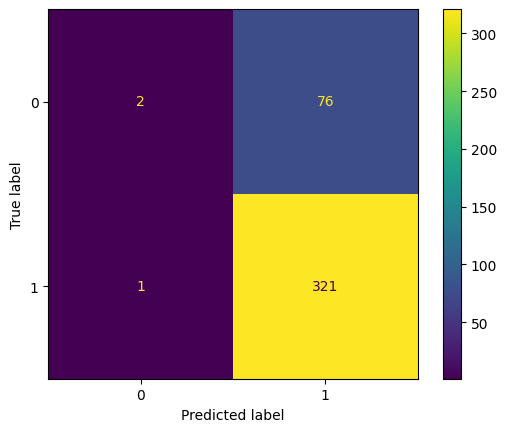

In [101]:
from sklearn.ensemble import RandomForestClassifier

# import the random forest model
rf = RandomForestClassifier()
# train the model
rf.fit(x_train, y_train)
# make predictions on the test set
y_pred_en = rf.predict(x_test)

# evaluate the model's performance
en_accuracy = accuracy_score(y_test, y_pred_en)
en_precision = precision_score(y_test, y_pred_en)
en_recall = recall_score(y_test, y_pred_en)
en_f1 = f1_score(y_test, y_pred_en)

print("Decision Tree evaluation: \n")

print(f"Accuracy: {en_accuracy}")
print(f"Precision: {en_precision}")
print(f"Recall: {en_recall}")
print(f"F1-score: {en_f1}")

print("\n")

print("Ensemble classification report: \n")

from sklearn.metrics import classification_report
en_classification_report=classification_report(y_test, y_pred_en)
print(en_classification_report)

print("\n")
print("Ensenble confusion matrix: \n")

cm_em=confusion_matrix(y_test, y_pred_en)
disp_em=ConfusionMatrixDisplay(cm_em)

disp_em.plot()


In [93]:
comparisonMatrix = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1],
    'en': [en_accuracy, en_precision, en_recall, en_f1],
}


df_comparisonMatrix = pd.DataFrame(comparisonMatrix)

print("Comparison between Decision tree, SVM and Ensemble")
print("\n")
print(df_comparisonMatrix)
print("\n")

print("Based on the evaluation metrics, the **SVM classifier** is the best-performing model. \nIt has the highest accuracy, recall, and F1-score. While the Random Forest model has a slightly higher precision, the overall performance of the SVM is superior. \nThe Decision Tree classifier has the lowest performance of the three.")

Comparison between Decision tree, SVM and Ensemble


      Metric  Decision Tree       SVM        en
0   Accuracy       0.642500  0.805000  0.805000
1  Precision       0.807560  0.805000  0.808081
2     Recall       0.729814  1.000000  0.993789
3   F1-Score       0.766721  0.891967  0.891365


Based on the evaluation metrics, the **SVM classifier** is the best-performing model. 
It has the highest accuracy, recall, and F1-score. While the Random Forest model has a slightly higher precision, the overall performance of the SVM is superior. 
The Decision Tree classifier has the lowest performance of the three.


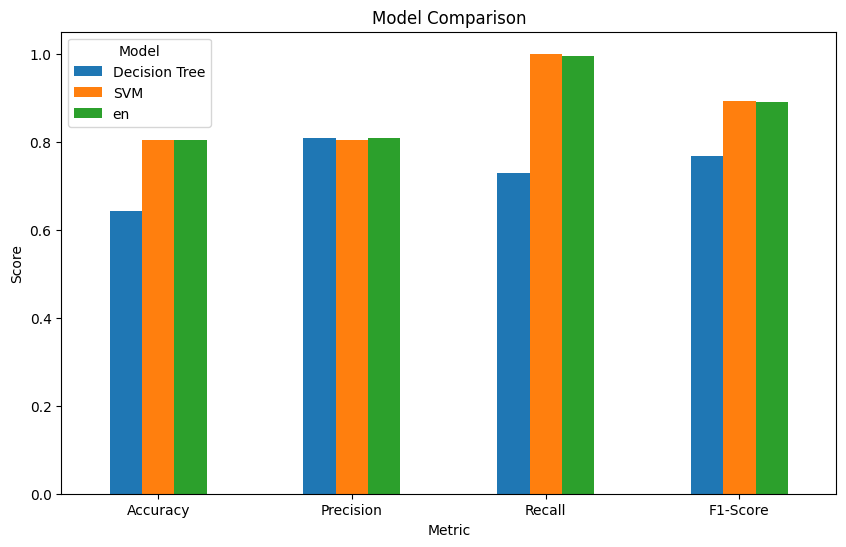

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# plot the comparison matrix
df_comparisonMatrix.plot(x='Metric', y=['Decision Tree', 'SVM', 'en'], kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.show()